In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset 
df = pd.read_csv('IPL_Dataset(2008-2024).csv')

In [5]:
display(df.head())

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [7]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Match_ID                 0
Date                     0
Teams                    0
Venue                    0
Toss_Winner              0
Toss_Decision            0
Match_Winner             0
Win_Type                19
Win_Margin              19
First_Innings_Score      0
Second_Innings_Score     3
Player_of_Match          5
Umpire                   0
Umpire1                  0
Umpire2                  0
Powerplay_Scores         0
Middle_Overs_Scores      0
Death_Overs_Scores       0
dtype: int64


In [21]:
# Convert date column to datetime format (if applicable)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['year'] = df['Date'].dt.year

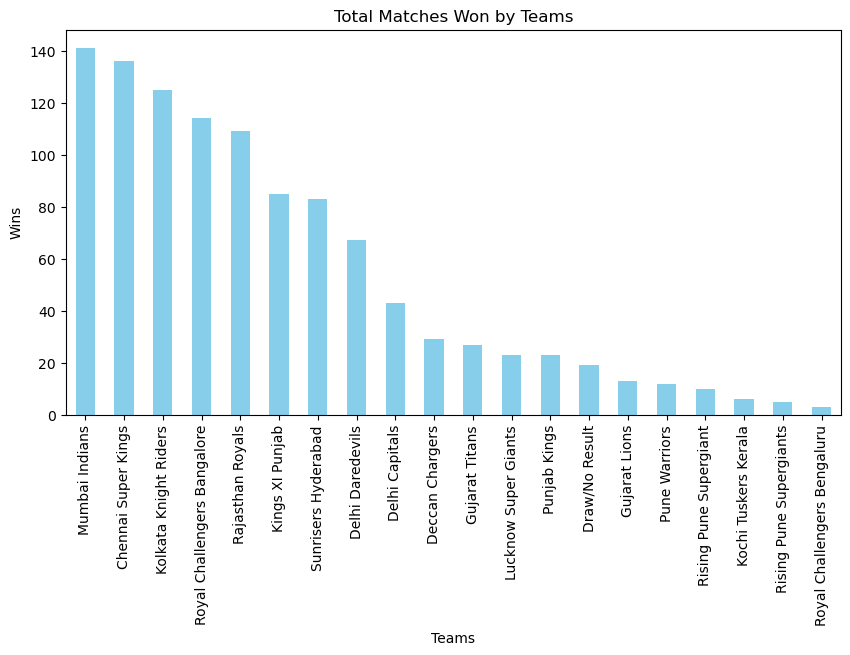

In [27]:
# 1. Match Outcome Analysis
if 'Match_Winner' in df.columns:
    match_wins = df['Match_Winner'].value_counts()
    plt.figure(figsize=(10, 5))
    match_wins.plot(kind='bar', color='skyblue')
    plt.title('Total Matches Won by Teams')
    plt.xlabel('Teams')
    plt.ylabel('Wins')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'winner' not found in dataset")


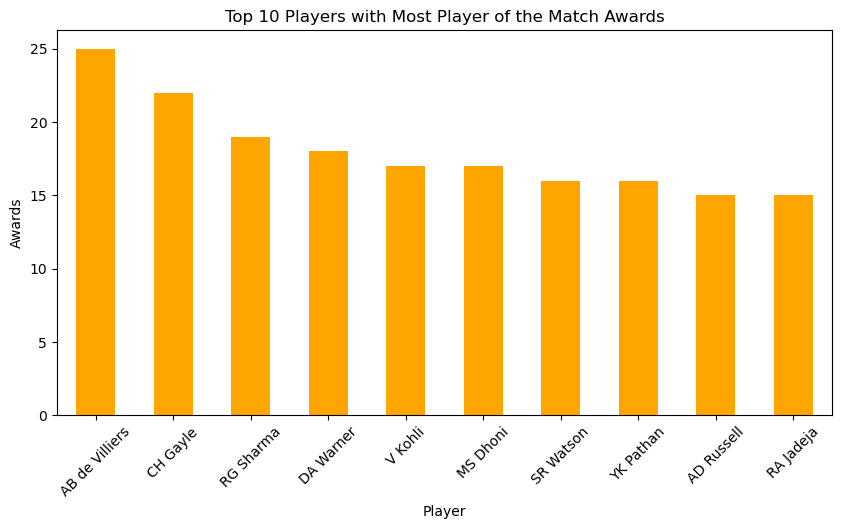

In [29]:
# 2. Player Performance (Based on Player of the Match Awards)
if 'Player_of_Match' in df.columns:
    top_players = df['Player_of_Match'].value_counts().head(10)
    
    plt.figure(figsize=(10, 5))
    top_players.plot(kind='bar', color='orange')
    plt.title('Top 10 Players with Most Player of the Match Awards')
    plt.xlabel('Player')
    plt.ylabel('Awards')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'player_of_match' not found in dataset")


In [31]:
# 3. Team Comparison
# Split the "teams" column into "team1" and "team2"
df[['team1', 'team2']] = df['Teams'].str.split(' vs ', expand=True)


In [33]:
display(df.head())

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,...,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,year,team1,team2
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,...,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64,2008,Royal Challengers Bangalore,Kolkata Knight Riders
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,...,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71,2008,Kings XI Punjab,Chennai Super Kings
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,...,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23,2008,Delhi Daredevils,Rajasthan Royals
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,...,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47,2008,Mumbai Indians,Royal Challengers Bangalore
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,...,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28,2008,Kolkata Knight Riders,Deccan Chargers


In [37]:
# Count matches played by each team
matches_played = df['team1'].value_counts() + df['team2'].value_counts()
matches_played

Chennai Super Kings            234
Deccan Chargers                 75
Delhi Capitals                  88
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  43
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          246
Lucknow Super Giants            40
Mumbai Indians                 257
Pune Warriors                   46
Punjab Kings                    52
Rajasthan Royals               215
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    240
Royal Challengers Bengaluru     10
Sunrisers Hyderabad            175
Name: count, dtype: int64

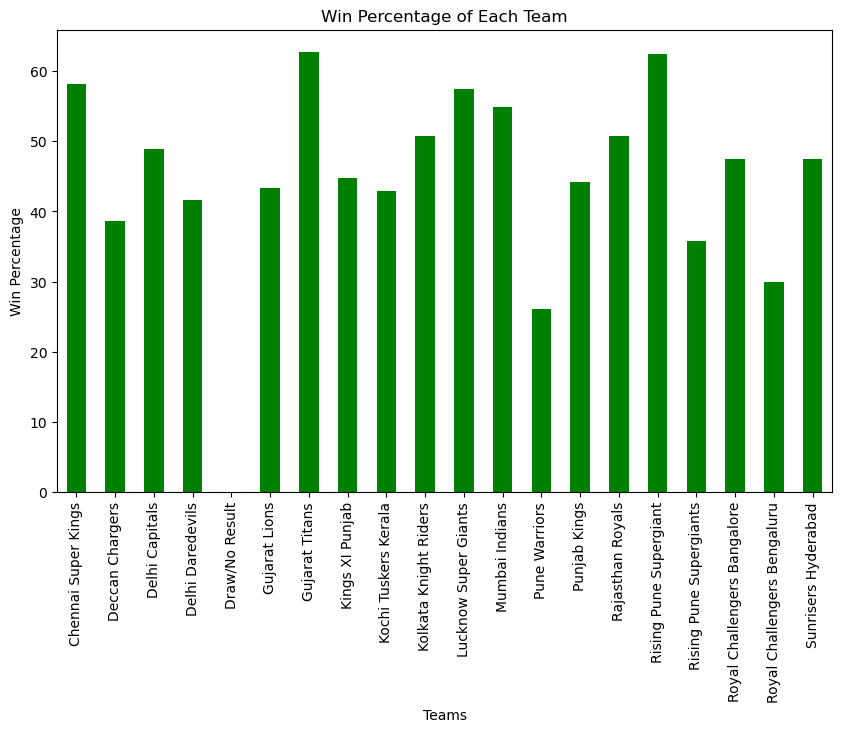

In [39]:
# Count matches won by each team
if 'Match_Winner' in df.columns:
    match_wins = df['Match_Winner'].value_counts()
    
    # Calculate win percentage
    win_percentage = (match_wins / matches_played) * 100

    # Plot Win Percentage
    plt.figure(figsize=(10, 6))
    win_percentage.plot(kind='bar', color='green')
    plt.title('Win Percentage of Each Team')
    plt.xlabel('Teams')
    plt.ylabel('Win Percentage')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'winner' not found in dataset")


In [49]:
# Ensure column names are correct before using
if 'First_Innings_Score' in df.columns and 'Second_Innings_Score' in df.columns:
    df['total_runs'] = df['First_Innings_Score'] + df['Second_Innings_Score']
else:
    print("Columns 'first_innings_score' or 'second_innings_score' not found in dataset")


In [51]:
display(df.head())

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,...,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,year,team1,team2,total_runs
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,...,Asad Rauf,RE Koertzen,J Srinath,61,97,64,2008,Royal Challengers Bangalore,Kolkata Knight Riders,304.0
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,...,MR Benson,SL Shastri,S Venkataraghavan,53,116,71,2008,Kings XI Punjab,Chennai Super Kings,447.0
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,...,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23,2008,Delhi Daredevils,Rajasthan Royals,261.0
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,...,SJ Davis,DJ Harper,J Srinath,47,71,47,2008,Mumbai Indians,Royal Challengers Bangalore,331.0
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,...,BF Bowden,K Hariharan,FM Engineer,39,43,28,2008,Kolkata Knight Riders,Deccan Chargers,222.0


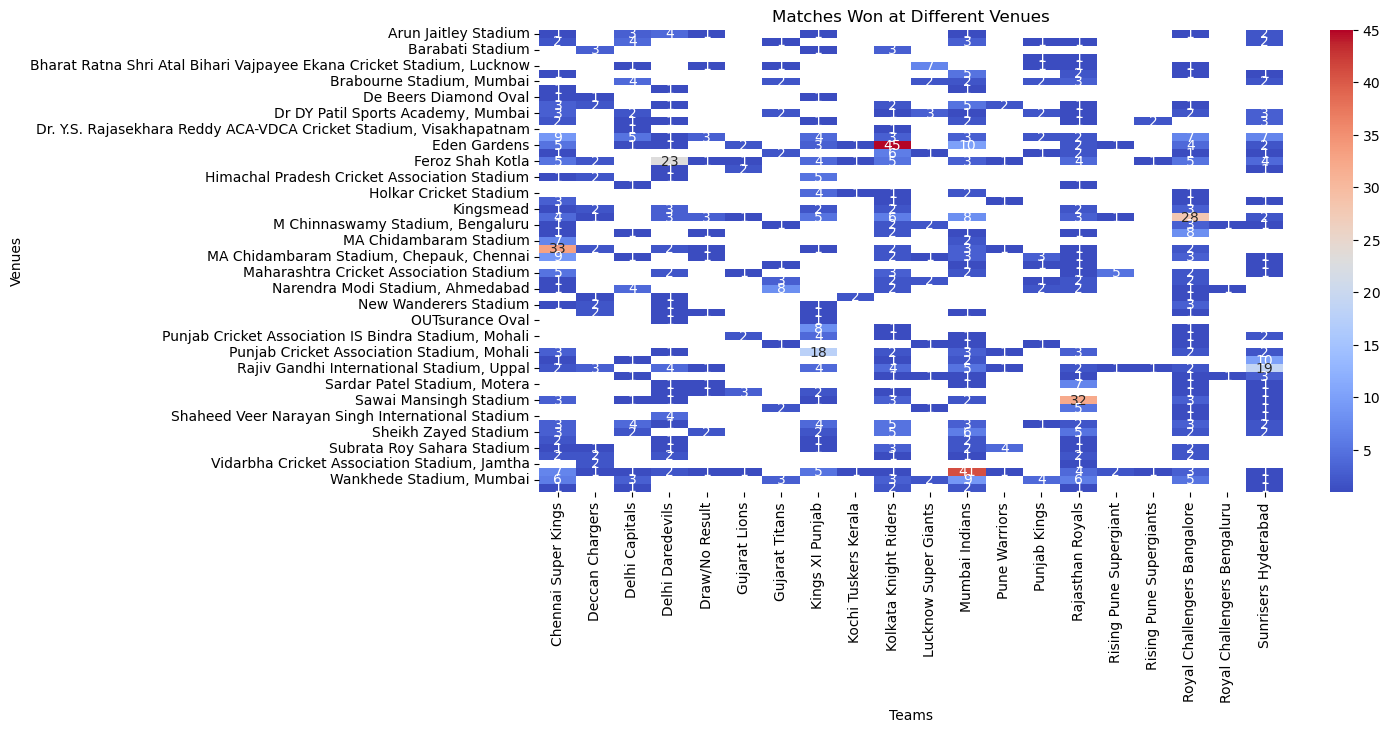

In [41]:
# 4. Venue Performance
if 'Venue' in df.columns and 'Match_Winner' in df.columns:
    venue_wins = df.groupby('Venue')['Match_Winner'].value_counts().unstack()
    plt.figure(figsize=(12, 6))
    sns.heatmap(venue_wins, cmap='coolwarm', annot=True, fmt='.0f')
    plt.title('Matches Won at Different Venues')
    plt.xlabel('Teams')
    plt.ylabel('Venues')
    plt.show()
else:
    print("Columns 'venue' or 'winner' not found in dataset")


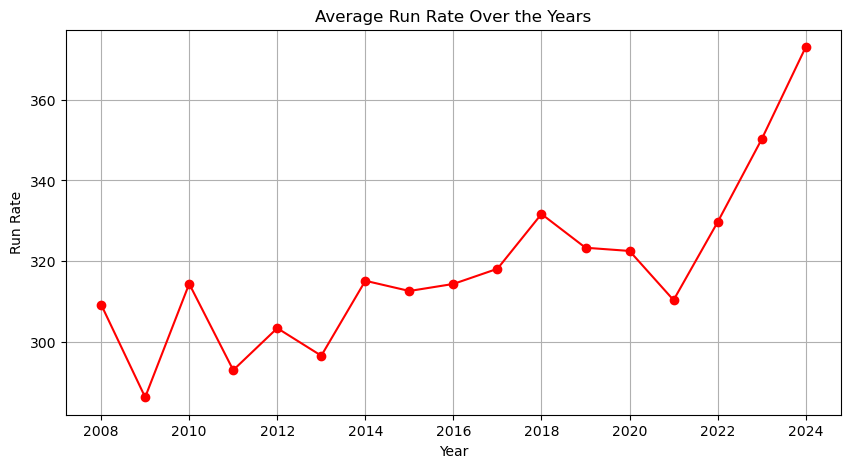

In [53]:
# 5. Run Rate & Scoring Analysis
if 'year' in df.columns and 'total_runs' in df.columns:
    run_rate = df.groupby('year')['total_runs'].mean()
    plt.figure(figsize=(10, 5))
    plt.plot(run_rate, marker='o', linestyle='-', color='red')
    plt.title('Average Run Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Run Rate')
    plt.grid()
    plt.show()
else:
    print("Columns 'year' or 'total_runs' not found in dataset")

In [ ]:
# 6. Best Batting Partnerships
if 'batsman' in df.columns and 'non_striker' in df.columns and 'batsman_runs' in df.columns:
    partnerships = df.groupby(['batsman', 'non_striker'])['batsman_runs'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    partnerships.plot(kind='barh', color='purple')
    plt.title('Top 10 Batting Partnerships')
    plt.xlabel('Total Runs')
    plt.ylabel('Partnership (Batsman & Non-Striker)')
    plt.show()
else:
    print("Columns 'batsman', 'non_striker', or 'batsman_runs' not found in dataset")


     year Player_of_Match  awards
28   2008        SE Marsh       5
80   2009       YK Pathan       3
121  2010    SR Tendulkar       4
133  2011        CH Gayle       6
188  2012        CH Gayle       5
253  2013      MEK Hussey       5
285  2014      GJ Maxwell       4
319  2015       DA Warner       4
386  2016         V Kohli       5
392  2017       BA Stokes       3
462  2018     Rashid Khan       4
475  2019      AD Russell       4
515  2020  AB de Villiers       3
592  2021      RD Gaikwad       4
622  2022   Kuldeep Yadav       4
702  2023    Shubman Gill       4
708  2024      AD Russell       2


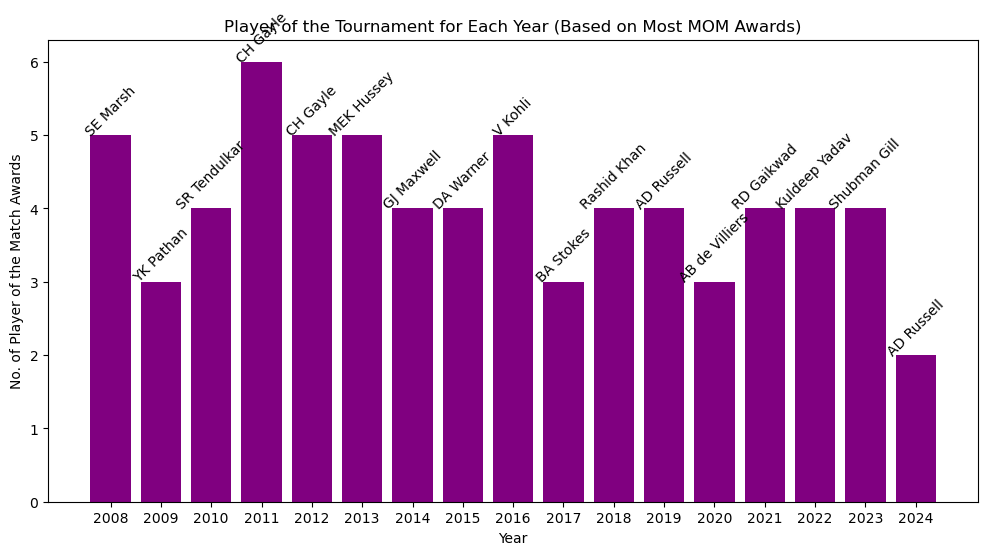

In [55]:
# Ensure necessary columns exist
if 'year' in df.columns and 'Player_of_Match' in df.columns:
    
    # Count the number of Player of the Match awards per player per year
    player_awards_per_year = df.groupby(['year', 'Player_of_Match']).size().reset_index(name='awards')
    
    # Get the player with the most awards for each year
    player_of_tournament = player_awards_per_year.loc[player_awards_per_year.groupby('year')['awards'].idxmax()]
    
    # Display the result
    print(player_of_tournament)

    # Visualization: Player of the Tournament over the years
    plt.figure(figsize=(12, 6))
    plt.bar(player_of_tournament['year'], player_of_tournament['awards'], color='purple')
    plt.xticks(player_of_tournament['year'])
    plt.xlabel('Year')
    plt.ylabel('No. of Player of the Match Awards')
    plt.title('Player of the Tournament for Each Year (Based on Most MOM Awards)')
    
    # Annotate player names on bars
    for i in range(len(player_of_tournament)):
        plt.text(player_of_tournament.iloc[i]['year'], player_of_tournament.iloc[i]['awards'], 
                 player_of_tournament.iloc[i]['Player_of_Match'], ha='center', fontsize=10, rotation=45)
    
    plt.show()

else:
    print("Columns 'year' or 'player_of_match' not found in dataset")
